**Problem Statement**

Indian Premier League (IPL) is a Twenty20 cricket format league in India. It is usually played in April and May every year. As of 2019, the title sponsor of the game is Vivo. The league was founded by Board of Control for Cricket India (BCCI) in 2008.

We have to predict 1st innings score of a team which is still batting based on certain factors like wickets fallen, overs done, total runs, runs in last 5 overs etc.

**Dataset**

The dataset for all the IPL matches details are taken from Kaggle

In [22]:
!pip install catboost

     |████████████████████████████████| 65.9MB 44kB/s 


# Step 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sb
sb.set()
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Step 2 - Importing the dataset

In [6]:
data = pd.read_csv('/content/drive/My Drive/Data Science Projects/ipl.csv')
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# Step 3 - Deleting unwanted details columns

In [7]:
data.drop(['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'], axis = 1, inplace = True)
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


# Step 4 - Deleting those teams which have been inconsistent during IPL

In [8]:
consistent_teams =  ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                     'Kings XI Punjab' , 'Mumbai Indians','Royal Challengers Bangalore',
                     'Delhi Daredevils', 'Sunrisers Hyderabad']

data = data[(data['bat_team'].isin(consistent_teams) & data['bowl_team'].isin(consistent_teams))]

data['bat_team'].unique()
data['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad'], dtype=object)

# Step 5 - Deleting rows where overs<=5.0 because we require a field runs in last 5 overs to predict 1st innings score

In [9]:
data = data[data['overs']>=5.0]

In [10]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


# Step 6 - Dividing dataset into Train and Test according to Time Series problem

In [11]:
data['date'] = pd.to_datetime(data.date, format='%Y/%m/%d')

data.reset_index(drop = True)


,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...
40103,2017-05-19,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
40104,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
40105,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
40106,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [12]:
# Train Test split like a Time-Series data, where data before and equal to 2016 is train and rest is test.

X_train = data[data['date'].dt.year<=2016]
X_test = data[data['date'].dt.year>2016]
Y_train = data[data['date'].dt.year<=2016]
Y_test = data[data['date'].dt.year>2016]

X_train = X_train.iloc[:, 1:-1]
X_test = X_test.iloc[:, 1:-1]
Y_train = Y_train.iloc[:, -1]
Y_test = Y_test.iloc[:, -1]

In [13]:
X_train.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1


In [14]:
Y_train.head()

32    222
33    222
34    222
35    222
36    222
Name: total, dtype: int64

# Step 7 - One Hot Encoding the data

In [15]:
# Onehot Encoding the data

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [0, 1])] , remainder = 'passthrough')

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Step 8 - Using and evaluating different Machine Learning models

In [23]:
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train, Y_train)

Learning rate set to 0.074341
0:	learn: 28.5709836	total: 53.9ms	remaining: 53.8s
1:	learn: 27.6040674	total: 59.8ms	remaining: 29.8s
2:	learn: 26.7407816	total: 65.5ms	remaining: 21.8s
3:	learn: 25.9836123	total: 70.8ms	remaining: 17.6s
4:	learn: 25.2800399	total: 76.4ms	remaining: 15.2s
5:	learn: 24.6502950	total: 81.9ms	remaining: 13.6s
6:	learn: 24.0823798	total: 87.6ms	remaining: 12.4s
7:	learn: 23.5982254	total: 93.3ms	remaining: 11.6s
8:	learn: 23.1031574	total: 98.7ms	remaining: 10.9s
9:	learn: 22.6721621	total: 105ms	remaining: 10.3s
10:	learn: 22.2752253	total: 110ms	remaining: 9.91s
11:	learn: 21.9194461	total: 116ms	remaining: 9.54s
12:	learn: 21.5964194	total: 121ms	remaining: 9.21s
13:	learn: 21.3127636	total: 127ms	remaining: 8.93s
14:	learn: 21.0684632	total: 132ms	remaining: 8.67s
15:	learn: 20.8008869	total: 138ms	remaining: 8.46s
16:	learn: 20.5788006	total: 143ms	remaining: 8.29s
17:	learn: 20.3699165	total: 149ms	remaining: 8.1s
18:	learn: 20.1882301	total: 154ms	r

In [16]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha = 40)
regressor.fit(X_train, Y_train)


Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [19]:
from sklearn.linear_model import Lasso
regressor = Lasso(alpha = 1)
regressor.fit(X_train, Y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

# Step 9 - Cross Validation and checking accuracy of model

Streaming output truncated to the last 5000 lines.
8:	learn: 21.8333143	total: 9.3ms	remaining: 1.02s
9:	learn: 21.3160497	total: 10.3ms	remaining: 1.02s
10:	learn: 20.8302146	total: 11.4ms	remaining: 1.02s
11:	learn: 20.4465730	total: 12.4ms	remaining: 1.02s
12:	learn: 20.0290426	total: 13.4ms	remaining: 1.02s
13:	learn: 19.5071225	total: 14.5ms	remaining: 1.02s
14:	learn: 19.1143169	total: 15.6ms	remaining: 1.02s
15:	learn: 18.7220910	total: 16.6ms	remaining: 1.02s
16:	learn: 18.3818881	total: 17.6ms	remaining: 1.02s
17:	learn: 18.0385368	total: 18.7ms	remaining: 1.02s
18:	learn: 17.6514519	total: 19.8ms	remaining: 1.02s
19:	learn: 17.3309600	total: 20.7ms	remaining: 1.02s
20:	learn: 17.0286337	total: 21.7ms	remaining: 1.01s
21:	learn: 16.7356218	total: 22.9ms	remaining: 1.02s
22:	learn: 16.4821342	total: 24ms	remaining: 1.02s
23:	learn: 16.2473141	total: 25.1ms	remaining: 1.02s
24:	learn: 15.9487021	total: 26.1ms	remaining: 1.02s
25:	learn: 15.6810047	total: 27.2ms	remaining: 1.02s


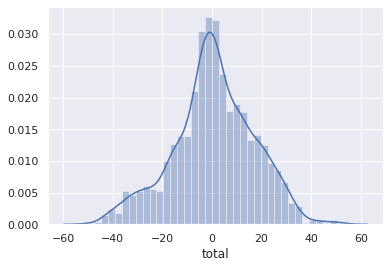

In [25]:
# Cross Validation and checknig accuracy

from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(regressor, X = X_test, y = Y_test, cv = 10, scoring = 'neg_mean_squared_error') 
accuracies.mean()

Y_test = Y_test.reset_index()
Y_test = Y_test.iloc[:,1]
yhat = regressor.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
accuracy = r2_score(Y_test, yhat)
mse = mean_squared_error(Y_test, yhat)

print("CV Accuracy",accuracies.mean())
print("Test Accuracy", accuracy)
print("Mean Squared Error", mse)
sb.distplot(Y_test-yhat) # It should be a normal distribution

# Step 10 - Saving the model for later use

In [26]:
# Exporting model

with open('regressor.pkl', 'wb') as filename:
  pickle.dump(regressor, filename)

**Conclusion**

Accuracy by Ridge

CV Accuracy -452.5528801168792
Test Accuracy 0.7522398603585867
Mean Squared Error 251.0317296411336

Accuracy by Lasso

CV Accuracy -320.61667192307885
Test Accuracy 0.7410539138954501
Mean Squared Error 262.36538279606964

Accuracy by CatBoost

CV Accuracy -694.341908952442
Test Accuracy 0.7329666909904575
Mean Squared Error 270.55939478190373

We can clearly see that **Ridge performed better than Lasso and CatBoost** , thus we will be using **Ridge as our Machine Learning model** and exporting same for the webapp and later use.